# **Data Cleaning:**
Summarize what we did in Excel, and some stuff moving into python
- dawg i had to manually remove values because 1). the list is so small, 2). not that hard as a result 3). excel/python would take more time
- deleted non 2021-2022 columns 

In [155]:
# TODO Determine a town which shows larger decreases in rental rates
# TODO Determine a town which shows larger increases in rental rates (try others)
# TODO Decide whether Raymond is actually necessary or should it just be Athabasca

In [156]:
# further data cleaning in pandas
import pandas as pd
pd.options.mode.chained_assignment = None 

# read datasets
table6 = pd.read_csv("Matthew's Data/Table6.csv")
table8 = pd.read_csv("Matthew's Data/Table8.csv")
table9 = pd.read_csv("Matthew's Data/table9.csv")

# create list of all strings that contain the names of communities in table 8
community_names = table8["Community"].unique().tolist()

# filter the csv based on if it exists in the observed commmunities
table9_byAreaNames = table9[table9["Area Name"].isin(community_names)]

# IMPUTATION WARNING: the only value  
table9_byAreaNames.loc[table9_byAreaNames["Area Name"] == "Grande Cache"] = table9_byAreaNames.loc[table9_byAreaNames["Area Name"] == "Grande Cache"].replace("--", "3276")

# convert 2022 and 2021 column to integer values (since it is currently being read as string)
table9_byAreaNames["2022"] = table9_byAreaNames["2022"].apply(lambda x: int(x))
table9_byAreaNames["2021"] = table9_byAreaNames["2021"].apply(lambda x: int(x))

# display populations (alphabetical order)
table9_byAreaNames = table9_byAreaNames.sort_values("Area Name")
table9_byAreaNames

# clean again 
#print(len(community_names))
#print(len(table9_remove0.index))
#for i in community_names:
    #if not table9_filtered["Area Name"].str.contains(i).any():
        #print(i, "is not in here")
        

,Area Name,Type,2021,2022
308,Athabasca,T,2842,2827
330,Banff,T,8574,9347
296,Barrhead,T,4437,4503
26,Bassano,T,1250,1255
409,Beaverlodge,T,2342,2371
...,...,...,...,...
183,Vegreville,T,5848,5819
190,Vermilion,T,4078,3978
59,Vulcan,T,1809,1825
131,Wainwright,T,6860,6741


In [157]:
# Cleaning and getting values from 2b-2
table2b_2 = pd.read_csv("Matthew's Data/Table 2b - 2.csv")
table2b_2

,Rental Range,Bachelor Units,Bachelor Vacant,Bachelor % Vacancy,1 - Bedroom Units,1 - Bedroom Vacant,1 - Bedroom % Vacancy,2 - Bedroom Units,2 - Bedroom Vacant,2 - Bedroom % Vacancy,3 - Bedroom Units,3 - Bedroom Vacant,3 - Bedroom % Vacancy,4+ Bedroom Units,4+ Bedroom Vacant,4+ Bedroom % Vacancy
0,< 500,53,22,41.5,18,1,5.6,10,1,10.0,4,3,75.0,-,-,-
1,500 - 649,29,2,6.9,147,21,14.3,63,5,7.9,5,0,0.0,-,-,-
2,650 - 799,72,12,16.7,766,82,10.7,644,73,11.3,38,2,5.3,-,-,-
3,800 - 949,180,3,1.7,665,77,11.6,1698,204,12.0,165,18,10.9,-,-,-
4,"950 - 1,099",3,0,0.0,150,18,12.0,862,108,12.5,297,30,10.1,-,-,-
5,"1,100 - 1,349",8,0,0.0,253,22,8.7,446,29,6.5,349,11,3.2,4,0,0.0
6,"1,350 +",-,-,-,87,3,3.4,479,42,8.8,320,29,9.1,14,1,7.1


For this data set, it was at some point much easier to clean manually than it was to use excel or python, due to the fact that in this check, less than 15 were absent due to some error, and was as a result, so using ctrl + f and manually editing was not (in general, it isn't a practical solution but here is somehow less time consuming than using python/excel)

In [158]:
# TODO fix tables 2b-2 and 2b
# TODO start working on faceted graph
# TODO for population before graph, make as ranges



Ok so here is the shit that I am going to do for my part, please listen to the checklist ANALYSIS
- make **Faceted Graph** for table 8 (and 6 now)
    - write observations if any
    - **MAINLY, WHAT RELATION BETWEEN RENT AND VACANCY IS THERE??**
        - **HOW DOES THIS CHANGE BETWEEN COMMUNITY SIZES??**

- <u>Sampled Towns</u> --> how might these be useful?
    - Banff, Drumheller, Slave Lake, 
        - *State why these are good representatives in the sample for the whole communities* in the notebook
            - sdf
    - Analyze overall Rental Range from table 2b and vacancy rates?
    - **AT LEAST 2 VISUALS/ANALYSIS WE WANT TO MAKE FROM THE SAMPLED TOWNS STUFF**


New changes
- removed commas in thousands from Table 8 --> can read as numerical values now
- removed "Overall Vacancy Rates" from Table 8, since this is covered in table 6 and is more accurate there, just need the weighted rents between years in table 8\
- added "population" which we want to analyze how town population sizes might also be related to costs and shit
    - add to faceted graph as an outer variable

In [159]:
# remove table8 zeroes (since this is false data)
table8 = table8[table8["2021 Weighted Rent"] != 0]
table8 = table8[table8["2022 Weighted Rent"] != 0]

table8

,Community,Unit Type,2021 Weighted Rent,2022 Weighted Rent
0,Athabasca,1 - Bedroom,840,852
1,Athabasca,2 - Bedroom,912,931
2,Athabasca,3 - Bedroom,1026,980
3,Athabasca,Bachelor,706,719
4,Banff,1 - Bedroom,1318,1435
...,...,...,...,...
247,Wainwright,Bachelor,450,434
248,Westlock,1 - Bedroom,775,768
249,Westlock,2 - Bedroom,881,881
250,Westlock,3 - Bedroom,972,963


-------

# **Visualizations + Analysis:**

dddddddd

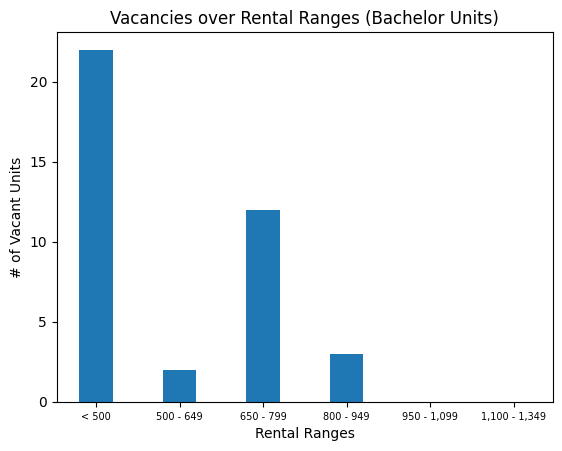

In [160]:
# General stuffs
import matplotlib.pyplot as plt
import numpy as np

# 
ranges = table2b_2["Rental Range"]

bachelor_rents = ranges.copy()[:6]
bachelor_vacants = table2b_2["Bachelor Vacant"][:6].apply(lambda x: int(x)) # 

# create stacked bar chart out of total sampled
x_axis = np.arange(len(bachelor_rents))
plt.bar(x_axis, bachelor_vacants, 0.4)

plt.xticks(x_axis, bachelor_rents, fontsize=7)
plt.title("Vacancies over Rental Ranges (Bachelor Units)")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

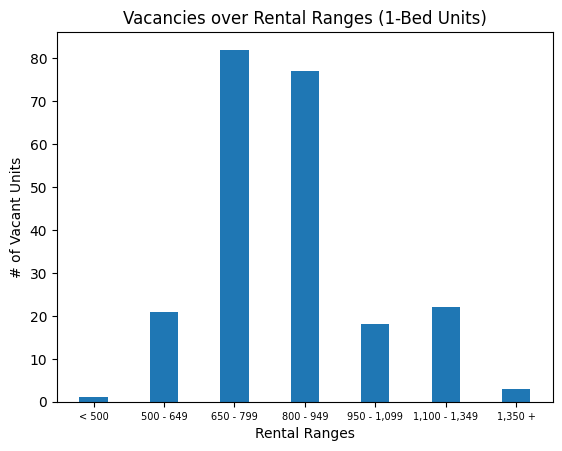

In [161]:
one_bed_vacants = table2b_2["1 - Bedroom Vacant"].apply(lambda x: int(x))

x_axis = np.arange(len(ranges))
plt.bar(x_axis, one_bed_vacants, 0.4)

plt.xticks(x_axis, ranges, fontsize=7)
plt.title("Vacancies over Rental Ranges (1-Bed Units)")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

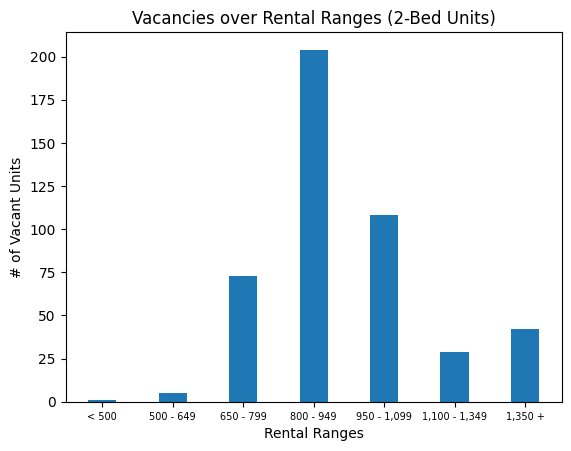

In [162]:
two_bed_vacants = table2b_2["2 - Bedroom Vacant"].apply(lambda x: int(x))

x_axis = np.arange(len(ranges))
plt.bar(x_axis, two_bed_vacants, 0.4)

plt.xticks(x_axis, ranges, fontsize=7)
plt.title("Vacancies over Rental Ranges (2-Bed Units)")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

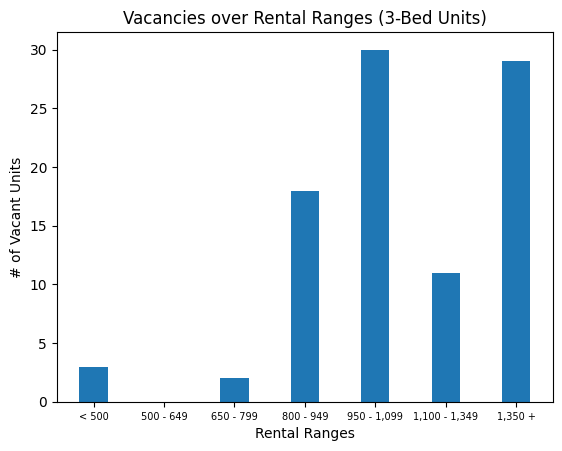

In [163]:
three_bed_vacants = table2b_2["3 - Bedroom Vacant"].apply(lambda x: int(x))

x_axis = np.arange(len(ranges))
plt.bar(x_axis, three_bed_vacants, 0.4)

plt.xticks(x_axis, ranges, fontsize=7)
plt.title("Vacancies over Rental Ranges (3-Bed Units)")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

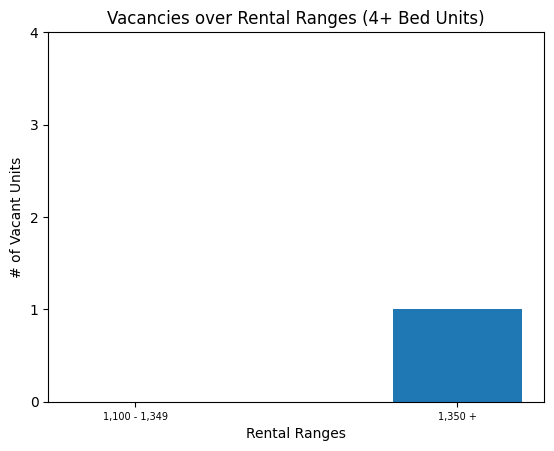

In [164]:
four_bed_vacants = table2b_2["4+ Bedroom Vacant"][5:].apply(lambda x: int(x))

x_axis = np.arange(len(ranges[5:]))
plt.ylim(0,4)
plt.bar(x_axis, four_bed_vacants, 0.4)

plt.xticks(x_axis, ranges[5:], fontsize=7)
plt.yticks([0,1,2,3,4])
plt.title("Vacancies over Rental Ranges (4+ Bed Units)")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

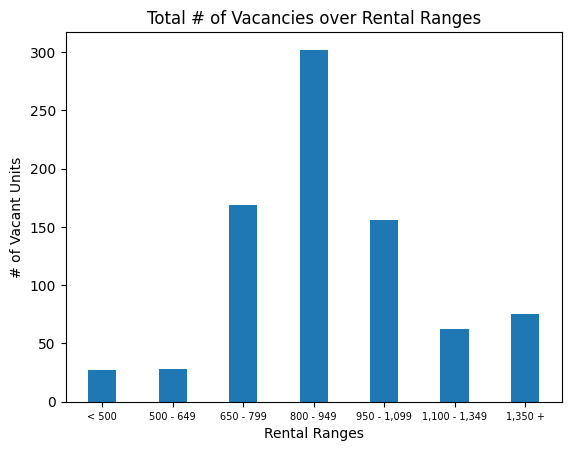

In [165]:
# Overall Vacancy vs Rental Range

# asdf
overall_table = table2b_2.copy()
overall_table.drop(["Bachelor % Vacancy","1 - Bedroom % Vacancy","2 - Bedroom % Vacancy","3 - Bedroom % Vacancy", "4+ Bedroom % Vacancy"], axis=1, inplace=True) #
overall_table.replace('-','0', inplace=True) #

# get total units for each type 
vacants = ["Bachelor Vacant", "1 - Bedroom Vacant", "2 - Bedroom Vacant", "3 - Bedroom Vacant", "4+ Bedroom Vacant"]   
overall_table[vacants] = overall_table[vacants].apply(lambda x: x.astype(int)) # convert 

vacants_totals = []
for i in range(7):
    vac = overall_table.loc[i, vacants].sum()
    vacants_totals.append(vac)

x_vals = np.arange(len(ranges))
plt.bar(x_vals, np.array(vacants_totals), 0.4)

plt.xticks(x_vals, ranges, fontsize=7)
plt.title("Total # of Vacancies over Rental Ranges")
plt.xlabel("Rental Ranges")
plt.ylabel("# of Vacant Units")
plt.show()

Potential Conclusions from these visuals:
- This one is pretty much just number of vacancies relative to the number of units over rental ranges
- Overall, for the most part pretty much mostly, the vacancies tend to be proportional to the number of units in that range

In [166]:
# TODO Calculate mean rent for each bedroom type (we use 2022 as a decent estimate)
mean_bachelors2022 = table8[table8["Unit Type"] == "Bachelor"]["2022 Weighted Rent"].mean()
mean_1beds2022 = table8[table8["Unit Type"] == "1 - Bedroom"]["2022 Weighted Rent"].mean()
mean_2beds2022 = table8[table8["Unit Type"] == "2 - Bedroom"]["2022 Weighted Rent"].mean()
mean_3beds2022 = table8[table8["Unit Type"] == "3 - Bedroom"]["2022 Weighted Rent"].mean()
mean_4beds2022 = table8[table8["Unit Type"] == "4+ Bedroom"]["2022 Weighted Rent"].mean()

mean_bachelors2021 = table8[table8["Unit Type"] == "Bachelor"]["2021 Weighted Rent"].mean()
mean_1beds2021 = table8[table8["Unit Type"] == "1 - Bedroom"]["2021 Weighted Rent"].mean()
mean_2beds2021 = table8[table8["Unit Type"] == "2 - Bedroom"]["2021 Weighted Rent"].mean()
mean_3beds2021 = table8[table8["Unit Type"] == "3 - Bedroom"]["2021 Weighted Rent"].mean()
mean_4beds2021 = table8[table8["Unit Type"] == "4+ Bedroom"]["2021 Weighted Rent"].mean()

print("2021 Mean Bachelor Rents:",mean_bachelors2021)
print("2021 Mean 1 - Bedroom Rents:",mean_1beds2021)
print("2021 Mean 2 - Bedroom Rents:",mean_2beds2021)
print("2021 Mean 3 - Bedroom Rents:",mean_3beds2021)
print("2021 Mean 4+ Bedroom Rents:",mean_4beds2021)

print()

print("2022 Mean Bachelor Rents:",mean_bachelors2022)
print("2022 Mean 1 - Bedroom Rents:",mean_1beds2022)
print("2022 Mean 2 - Bedroom Rents:",mean_2beds2022)
print("2022 Mean 3 - Bedroom Rents:",mean_3beds2022)
print("2022 Mean 4+ Bedroom Rents:",mean_4beds2022)

2021 Mean Bachelor Rents: 688.741935483871
2021 Mean 1 - Bedroom Rents: 779.925925925926
2021 Mean 2 - Bedroom Rents: 900.6101694915254
2021 Mean 3 - Bedroom Rents: 1036.625
2021 Mean 4+ Bedroom Rents: 1625.0

2022 Mean Bachelor Rents: 702.741935483871
2022 Mean 1 - Bedroom Rents: 826.0
2022 Mean 2 - Bedroom Rents: 943.1186440677966
2022 Mean 3 - Bedroom Rents: 1064.6041666666667
2022 Mean 4+ Bedroom Rents: 1708.6


In [167]:
# Drayton Valley, McLennan, Two Hills, Slave Lake
sample_smalltowns = ["Athabasca","Bruderheim", "Millet", "Two Hills","Slave Lake"] #
costs_smalltowns = table8[table8["Community"].isin(sample_smalltowns)]
vacancy_smalltowns = table6[table6["Community"].isin(sample_smalltowns)]

atha = costs_smalltowns[costs_smalltowns["Community"] == "Athabasca"]
fortmac = costs_smalltowns[costs_smalltowns["Community"] == "Bruderheim"]
ray = costs_smalltowns[costs_smalltowns["Community"] == "Millet"]
two_hills = costs_smalltowns[costs_smalltowns["Community"] == "Two Hills"]
did = costs_smalltowns[costs_smalltowns["Community"] == "Slave Lake"]

atha_rents = atha[["2021 Weighted Rent", "2022 Weighted Rent"]]
fortmac_rents = fortmac[["2021 Weighted Rent", "2022 Weighted Rent"]]
ray_rents = ray[["2021 Weighted Rent", "2022 Weighted Rent"]]
th_rent = two_hills[["2021 Weighted Rent", "2022 Weighted Rent"]]
did_rents = did[["2021 Weighted Rent", "2022 Weighted Rent"]]


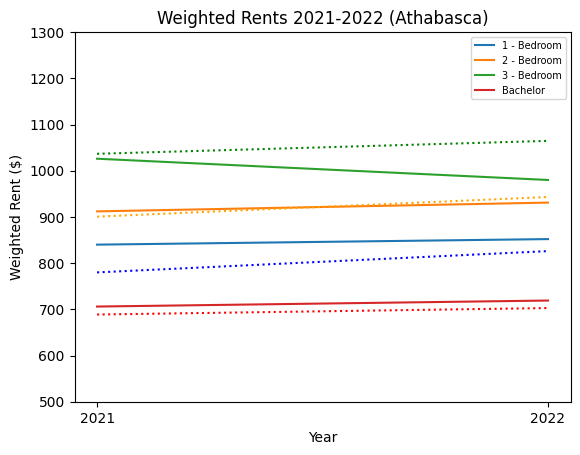

In [168]:
# small change only example (baseline)
for i in range(len(atha.index)):
    plt.plot(["2021", "2022"], atha_rents.iloc[i], label=atha["Unit Type"].iloc[i])

plt.ylim(500, 1300)
plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")

plt.title("Weighted Rents 2021-2022 (Athabasca)") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 7})
plt.show()

In [ ]:
# bar graph of individual vacancies:
atha_vacancies = pd.read_csv("Matthew's Data/Athabasca Summary.csv")
atha_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
atha_vacancies =    

#plt.bar(atha_vacancies.columns[1:6], np.array(atha_vacancies.iloc[2][1:6]), 0.4)
#plt.title("Vacancy Rates by Unit Type")
#plt.xlabel("Unit Type")
#plt.ylabel("Vacancy Rate")
#plt.show()

Bachelor         0.0
1 - Bedroom    0.067
2 - Bedroom    0.155
3 - Bedroom    0.059
4+ Bedroom       0.0
Unnamed: 6       NaN
Unnamed: 7       NaN
Unnamed: 8       NaN
Unnamed: 9       NaN
Unnamed: 10      NaN
Unnamed: 11      NaN
Unnamed: 12      NaN
Unnamed: 13      NaN
Unnamed: 14      NaN
Unnamed: 15      NaN
Unnamed: 16      NaN
Unnamed: 17      NaN
Unnamed: 18      NaN
Unnamed: 19      NaN
Unnamed: 20      NaN
Unnamed: 21      NaN
Unnamed: 22      NaN
Name: Percentage, dtype: object

<u>Notes</u>:
- This graph has rents close to the average mostly for all units
- 3-bedroom did experience a drop a bit below the average pricing for 3-bedroom rents, the rest are mostly stable
- Vacancy Rate decreased by $6\%$ from $15.5\%$ to $9.5\%$

- 0, 6.7, 15.5, 5.9 for each bedroom type

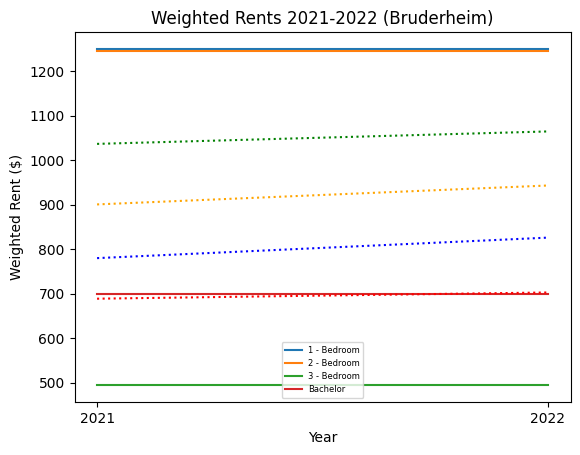

In [170]:
# increasing trend example
for i in range(len(fortmac.index)):
    plt.plot(["2021", "2022"], fortmac_rents.iloc[i], label=fortmac["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 (Bruderheim)") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6})
plt.show()

<u>Notes</u>:
- All rental prices remained exactly the same for all units in both years
- However, the 1-bed and 2-bed has an average rent of > $1200
- 3-bedroom has avg rent of <$500 --> most common type
- Vacancy Rate went up from $38.8\%$ to $45\%$

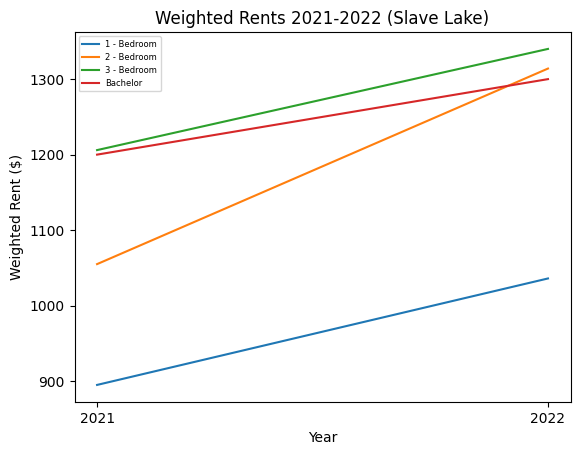

In [171]:
# increasing trend example
for i in range(len(did.index)):
    plt.plot(["2021", "2022"], did_rents.iloc[i], label=did["Unit Type"].iloc[i])

plt.title("Weighted Rents 2021-2022 (Slave Lake)") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6})
plt.show()

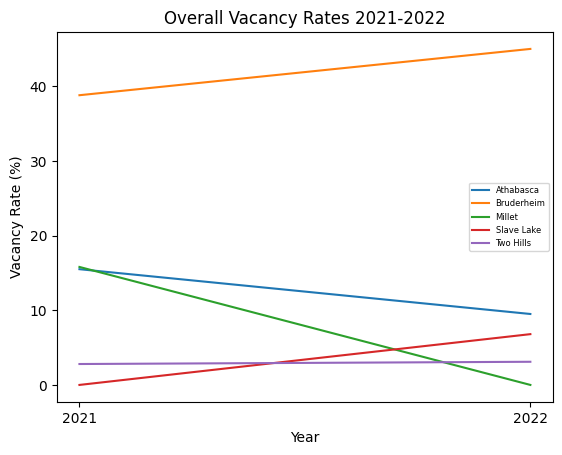

In [172]:
# small town vacancies
vacancy_smalltowns_num = vacancy_smalltowns[["2021 Vacancy", "2022 Vacancy"]]
for i in range(len(vacancy_smalltowns.index)):
    plt.plot(["2021", "2022"], vacancy_smalltowns_num.iloc[i], label=vacancy_smalltowns["Community"].iloc[i])

plt.title("Overall Vacancy Rates 2021-2022") 
plt.xlabel("Year")
plt.ylabel("Vacancy Rate (%)")
plt.legend(prop={'size': 6})
plt.show()